# Лабораторная работа №2
## Выполнил студент группы БСТ1903 Смоляков И.В.
Реализовать методы поиска в соответствии с заданием. Организовать генерацию
начального набора случайных данных. Для всех вариантов добавить реализацию
добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма
поиска и сравнить его со временем работы стандартной функции поиска, используемой в
выбранном языке программирования.
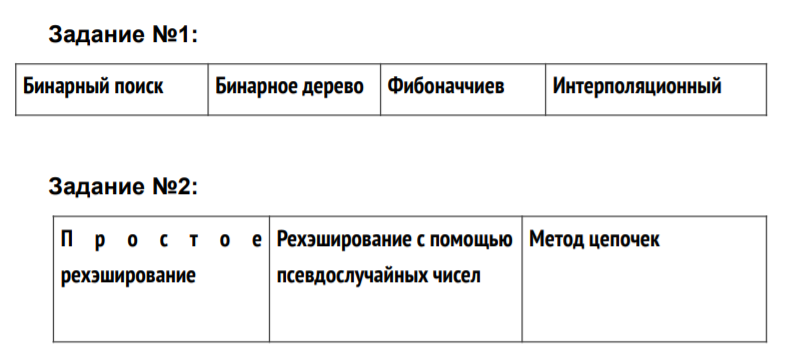

### Задание 1
### Бинарное дерево

In [1]:
import random
import time

class TreeNode:
    def __init__(self, value, left = None, right = None, parent = None):
        self.value = value
        self.leftChild = left
        self.rightChild = right
        self.parent = parent
    
    def hasLeftChild(self):
        return self.leftChild
    
    def hasRightChild(self):
        return self.rightChild
    
    def isLeftChild(self):
        return self.parent and self.parent.leftChild == self
    
    def isRightChild(self):
        return self.parent and self.parent.rightChild == self
    
    def isLeaf(self):
        return not (self.rightChild or self.leftChild)
    
    def hasBothChildren(self):
        return self.rightChild and self.leftChild
    
    def spliceOut(self):
        if self.isLeaf():
            if self.isLeftChild():
                self.parent.leftChild = None
            else:
                self.parent.rightChild = None
        elif self.hasAnyChildren():
            if self.hasLeftChild():
                if self.isLeftChild():
                    self.parent.leftChild = self.leftChild
                else:
                    self.parent.rightChild = self.leftChild
                self.leftChild.parent = self.parent
            else:
                if self.isLeftChild():
                    self.parent.leftChild = self.rightChild
                else:
                    self.parent.rightChild = self.rightChild
                self.rightChild.parent = self.parent

    def findSuccessor(self):
        succ = None
        if self.hasRightChild():
            succ = self.rightChild.findMin()
        else:
            if self.parent:
                if self.isLeftChild():
                    succ = self.parent
                else:
                    self.parent.rightChild = None
                    succ = self.parent.findSuccessor()
                    self.parent.rightChild = self
        return succ

    def findMin(self):
        current = self
        while current.hasLeftChild():
            current = current.leftChild
        return current
    
    def replaceNodeData(self, value, leftChild, rightChild):
        self.value = value
        self.leftChild = leftChild
        self.rightChild = rightChild
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self
    
class BinaryTree:
    def __init__(self):
        self.root = None
        self.size = 0
    
    def length(self):
        return self.size
    
    def add(self, value):
        if self.root:
            self._add(value, self.root)
        else:
            self.root = TreeNode(value)
        self.size = self.size + 1
    
    def _add(self, value, currentNode):
        if value < currentNode.value:
            if currentNode.hasLeftChild():
                self._add(value, currentNode.leftChild)
            else:
                currentNode.leftChild = TreeNode(value, parent = currentNode)
        else:
            if currentNode.hasRightChild():
                self._add(value, currentNode.rightChild)
            else:
                currentNode.rightChild = TreeNode(value, parent = currentNode)
    
    def getItemNode(self, value, currentNode = None):
        if currentNode is None:
            currentNode = self.root
        if value < currentNode.value:
            if currentNode.hasLeftChild():
                return self.getItemNode(value, currentNode.leftChild)
            else:
                return None
        elif value > currentNode.value:
            if currentNode.hasRightChild():
                return self.getItemNode(value, currentNode.rightChild)
            else:
                return None
        else:
            return currentNode
    
    def isInTree(self, value):
        if self.getItemNode(value):
            print("Значение ", value, " найдено")
        else:
            print("Значение ", value, " не найдено")
    
    def deleteItem(self, value):
        if self.size > 1:
            nodeToRemove = self.getItemNode(value)
            if nodeToRemove:
                self.remove(nodeToRemove)
                self.size -= 1
                print("Значение ", value, " успешно удалено")
            else:
                print("Данного значения нет в дереве")
        elif self.size == 1 and self.root.value == value:
            self.root = None
            self.size -= 1
            print("Значение ", value, " успешно удалено")
        else:
            print("Данного значения нет в дереве")
    
    def remove(self, currentNode):
        if currentNode.isLeaf():
            if currentNode == currentNode.parent.leftChild:
                currentNode.parent.leftChild = None
            else:
                currentNode.parent.rightChild = None
        elif currentNode.hasBothChildren():
            succ = currentNode.findSuccessor()
            succ.spliceOut()
            currentNode.value = succ.value
        else:
            if currentNode.hasLeftChild():
                if currentNode.isLeftChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.leftChild
                elif currentNode.isRightChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.leftChild
                else:
                    currentNode.replaceNodeData(currentNode.leftChild.value,
                                                currentNode.leftChild.leftChild,
                                                currentNode.leftChild.rightChild)
            else:
                if currentNode.isLeftChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.rightChild
                elif currentNode.isRightChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.rightChild
                else:
                    currentNode.replaceNodeData(currentNode.rightChild.value,
                                                currentNode.rightChild.leftChild,
                                                currentNode.rightChild.rightChild)
                    
    def insertList(self, arr):
        for i in arr:
            self.add(i)

### Бинарный поиск

In [2]:
def binarySearch(arr, key, lowest = 0, highest = None):
    if highest is None:
        highest = len(arr) - 1
    if lowest <= highest:
        item = (lowest + highest) // 2
        if arr[item] == key:
            return item
        elif arr[item] > key:
            return binarySearch(arr, key, lowest, item - 1)
        else:
            return binarySearch(arr, key, item + 1, highest)
    else:
        return -1

### Фибоначчиев поиск

In [3]:
def fibonacciSearch(arr, key):
    fibM_minus_2 = 0
    fibM_minus_1 = 1
    fibM = fibM_minus_1 + fibM_minus_2
    while (fibM < len(arr)):
        fibM_minus_2 = fibM_minus_1
        fibM_minus_1 = fibM
        fibM = fibM_minus_1 + fibM_minus_2
    index = -1;
    while (fibM > 1):
        i = min(index + fibM_minus_2, (len(arr)-1))
        if (arr[i] < key):
            fibM = fibM_minus_1
            fibM_minus_1 = fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
            index = i
        elif (arr[i] > key):
            fibM = fibM_minus_2
            fibM_minus_1 = fibM_minus_1 - fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
        else :
            return i
    if(fibM_minus_1 and index < (len(arr)-1) and arr[index+1] == key):
        return index+1;
    return -1

### Интерполяционный поиск

In [4]:
def interpolationSearch(arr, key):
    low = 0
    high = (len(arr) - 1)
    while low <= high and key >= arr[low] and key <= arr[high]:
        index = low + int(((float(high - low) / ( arr[high] - arr[low])) * ( key - arr[low])))
        if arr[index] == key:
            return index
        if arr[index] < key:
            low = index + 1;
        else:
            high = index - 1;
    return -1

### Задание 2
### Простое рехэширование

In [5]:
class HashTable:  
    def __init__(self, size = 20):
        self.size = size
        self.data = [None for i in range(size)]
            
    def get_hash(self, key, i=0):
        return (hash(key) + i) % self.size
    
    def __getitem__(self, key):
        i = 0
        while True:
            index = self.get_hash(key, i)
            if self.data[index] is None or i == self.size:
                break
            if self.data[index][0] == key:
                return self.data[index][1]
            i += 1
    
    def __setitem__(self, key, value):
        i = 0
        while True:
            index = self.get_hash(key, i)
            if self.data[index] is None:
                self.data[index] = (key, value)
                break
            elif self.data[index] is not None and i != self.size:
                i += 1
                continue
            else:
                print("В таблице нет свободных ячеек")
                break 
        
    def __delitem__(self, key):
        i = 0
        while True:
            index = self.get_hash(key, i)
            if self.data[index][0] == key:
                self.data[index] = None
                print("Элемент {} удален".format(key))
                break
            elif self.data[index] is not None and i != self.size:
                i += 1
                continue
            else:
                print("Элемента {} нет в таблице".format(key))
                break

### Рехэширование с помощью псевдослучайных чисел

In [6]:
class HashTableRand(HashTable):
    def get_hash(self, key, i=0):
        return (2 * hash(key) + i+2) % self.size

### Метод цепочек

In [7]:
class HashTableChain(HashTable):
    def __init__(self, size = 20):
        self.size = size
        self.data = [[] for i in range(size)]
    
    def get_hash(self, key):
        return hash(key) % self.size
    
    def __getitem__(self, key):
        arr_index = self.get_hash(key)
        for kv in self.data[arr_index]:
            if kv[0] == key:
                return kv[1]
            
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        found = False
        for idx, element in enumerate(self.data[h]):
            if len(element)==2 and element[0] == key:
                self.data[h][idx] = (key,val)
                found = True
        if not found:
            self.data[h].append((key,val))
        
    def __delitem__(self, key):
        arr_index = self.get_hash(key)
        for index, kv in enumerate(self.data[arr_index]):
            if kv[0] == key:
                print("Элемент {} удален".format(key))
                del self.data[arr_index][index]

### Стандартный поиск

In [8]:
def defaultSearch(arr, key):
    try:
        return arr.index(key)
    except ValueError:
        return -1

### Вспомогательные функции для оценки времени работы поиска

In [9]:
def searchItem(arr, key, searchMethod):
    startTime = time.perf_counter()
    searchMethod(arr, key)        
    return time.perf_counter() - startTime

def searchItemHash(table, key):
    startTime = time.perf_counter()
    table[key]
    return time.perf_counter() - startTime

def searchItemTree(tree, key):
    startTime = time.perf_counter()
    tree.isInTree(key)
    return time.perf_counter() - startTime

def fillHashTable(arr, arrStr, table):
    for i in range(len(arrStr)):
        table[arr[i]] = arrStr[i]

### Результаты

In [10]:
arr = [0, 4, 8, 11, 16, 19, 20, 21, 32, 33, 50, 91, 94, 96, 99]
arrStr = ["a", "b", "c", "d", "e", "f", "g"]
key = 20

tree = BinaryTree()
tree.insertList(arr)

tableStandard = HashTable()
tableRand = HashTableRand()
tableChain = HashTableChain()

fillHashTable(arr, arrStr, tableStandard)
fillHashTable(arr, arrStr, tableRand)
fillHashTable(arr, arrStr, tableChain)


print(arr)
print("Время поиска элемента 20")
print("Стандартный поиск: ", searchItem(arr, key, defaultSearch))
print("Бинарный поиск: ", searchItem(arr, key, binarySearch))
print("Фибоначчиев поиск: ", searchItem(arr, key, fibonacciSearch))
print("Интерполяционный поиск: ", searchItem(arr, key, interpolationSearch))
print("Простое рехэширование: ", searchItemHash(tableStandard, key))
print("Псевдослучайное рехэширование: ", searchItemHash(tableRand, key))
print("Метод цепочек: ", searchItemHash(tableChain, key))
print("Бинарное дерево: ", searchItemTree(tree, key))

[0, 4, 8, 11, 16, 19, 20, 21, 32, 33, 50, 91, 94, 96, 99]
Время поиска элемента 20
Стандартный поиск:  2.0000000000575113e-06
Бинарный поиск:  5.500000000102645e-06
Фибоначчиев поиск:  8.400000000019503e-06
Интерполяционный поиск:  9.29999999987885e-06
Простое рехэширование:  5.199999999927485e-06
Псевдослучайное рехэширование:  4.899999999974369e-06
Метод цепочек:  6.500000000020378e-06
Значение  20  найдено
Бинарное дерево:  0.0004260999999998738


### Задание 3

In [11]:
import random


class ChessBoard:
    def __init__(self, rows):
        self.rows = rows
        self.board = [[0 for _ in range(rows)] for _ in range(rows)]
        self.validPositions = [[True for _ in range(rows)] for _ in range(rows)]
        
    def toDefault(self):
        self.board = [[0 for _ in range(self.rows)] for _ in range(self.rows)]
        self.validPositions = [[True for _ in range(self.rows)] for _ in range(self.rows)]
    
    def changeValid(self, row, column):
        def changeRow(self, row):
            for c in range(self.rows):
                self.validPositions[row][c] = False
        
        def changeColumn(self, column):
            for r in range(self.rows):
                self.validPositions[r][column] = False
        
        def changeDiag(self, row, column):
            def changeMainDiag(self, row, column):
                if row <= column:
                    startPosR = 0
                    startPosC = column - row
                else:
                    startPosR = row - column
                    startPosC = 0
                for i in range(self.rows):
                    try:
                        self.validPositions[startPosR][startPosC] = False
                        startPosR += 1
                        startPosC += 1
                    except IndexError:
                        break
            
            def changeSecondaryDiag(self, row, column):
                if row + column <= self.rows -1:
                    startPosR = 0
                    startPosC = column + row
                else:
                    startPosR = column - (self.rows - 1 - row)
                    startPosC = self.rows - 1
                for i in range(self.rows):
                    self.validPositions[startPosR][startPosC] = False
                    startPosR += 1
                    if startPosR < 0 or startPosR > self.rows - 1:
                        break
                    startPosC -= 1
                    if startPosC < 0 or startPosC > self.rows - 1:
                        break
            
            changeMainDiag(self, row, column)
            changeSecondaryDiag(self, row, column)
        
        
        changeRow(self, row)
        changeColumn(self, column)
        changeDiag(self, row, column)
    
    
    def placeQueens(self):
        queenCount = 0
        while True:
            for i in range(self.rows):
                jNums = list(range(self.rows))
                while len(jNums) > 0:
                    j = jNums.pop(random.randint(0, len(jNums)-1))
                    if self.validPositions[i][j]:
                        self.board[i][j] = 1
                        self.changeValid(i, j)
                        queenCount += 1
                        break
            
            if queenCount < self.rows:
                self.toDefault()
                queenCount = 0
            else:
                break


ch = ChessBoard(10)
ch.placeQueens()
ch.board

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]